In [37]:
using PyCall, PyPlot
@pyimport seaborn as sns

# Single photon transitions

In [27]:
# loading data from files
f = open("../Data/2016-01-29_776nm_8213A_g1.dat")

for line in eachline(f)
    print(line)
    break
end

full_data_array = readdlm("../Data/2016-01-29_776nm_8213A_g1.dat", skipstart=1)

time = full_data_array[:, 2]
analog0 = full_data_array[:,3]
analog3 = full_data_array[:,6]

Iteration	Time	Analog 0	Analog 1	Analog 2	Analog 3	Analog 4	Analog 5	Analog 6	Analog 7


601-element Array{Float64,1}:
  3.9092
 -3.4473
 -1.6116
  4.9506
 -2.772 
 -6.5708
  2.981 
  5.4641
 -4.0076
 -2.2076
  3.8227
 -2.1214
 -3.4096
  ⋮     
  3.7197
 -3.1978
  1.0533
  2.4642
 -6.2038
 -2.4081
  7.583 
  1.5655
 -6.1931
  0.5675
  3.45  
 -3.3459

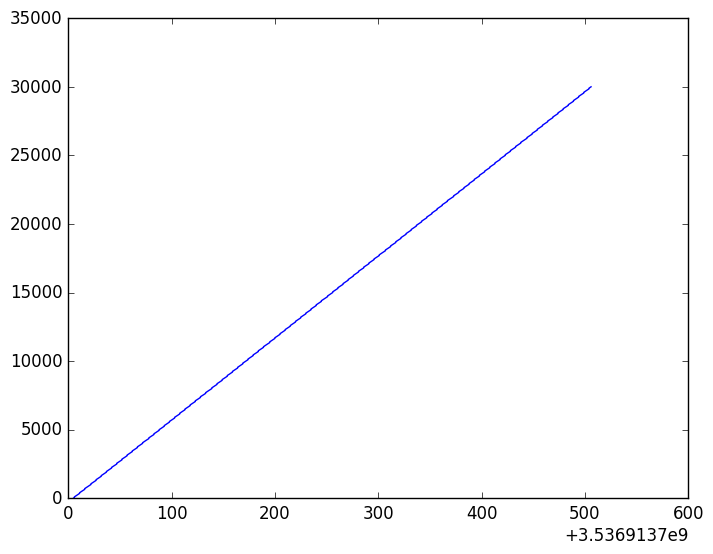

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1c21ec6c50>

In [33]:
plot(time, analog0)